# MNIST Digit Classification

This notebook demonstrates the process of classifying handwritten digits using the MNIST dataset. Start by importing necessary libraries and modules. This includes `sklearn` for dataset loading and splitting, `keras` for data preprocessing, and `matplotlib` for visualization.

## Import Libraries


In [239]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the MNIST Dataset

load the MNIST dataset and examine its keys to understand the data structure. 


In [240]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## Data Exploration

Converting the data into a pandas DataFrame for better visualization and analysis. Displaying the first few rows of the dataset to get an idea of the data.


In [241]:
data_mnist = pd.DataFrame(mnist.data)
data_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Data Preparation

Converting the data into a numpy array, which will be used for training the machine learning model.


In [242]:
data = np.array(data_mnist)

In [243]:
target_mnist = pd.DataFrame(mnist.target)
target_mnist.head()

,0
0,0
1,1
2,2
3,3
4,4


In [244]:
target = np.array(target_mnist)

1797 64


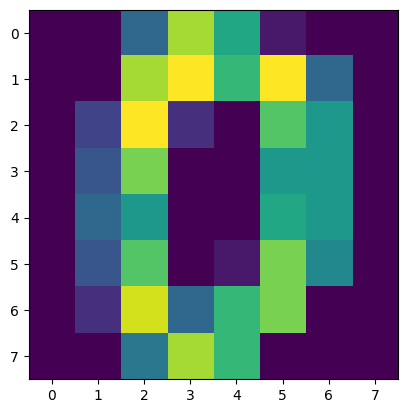

In [245]:
m, n = data_mnist.shape
plt.imshow(mnist.images[0])
print(m, n)

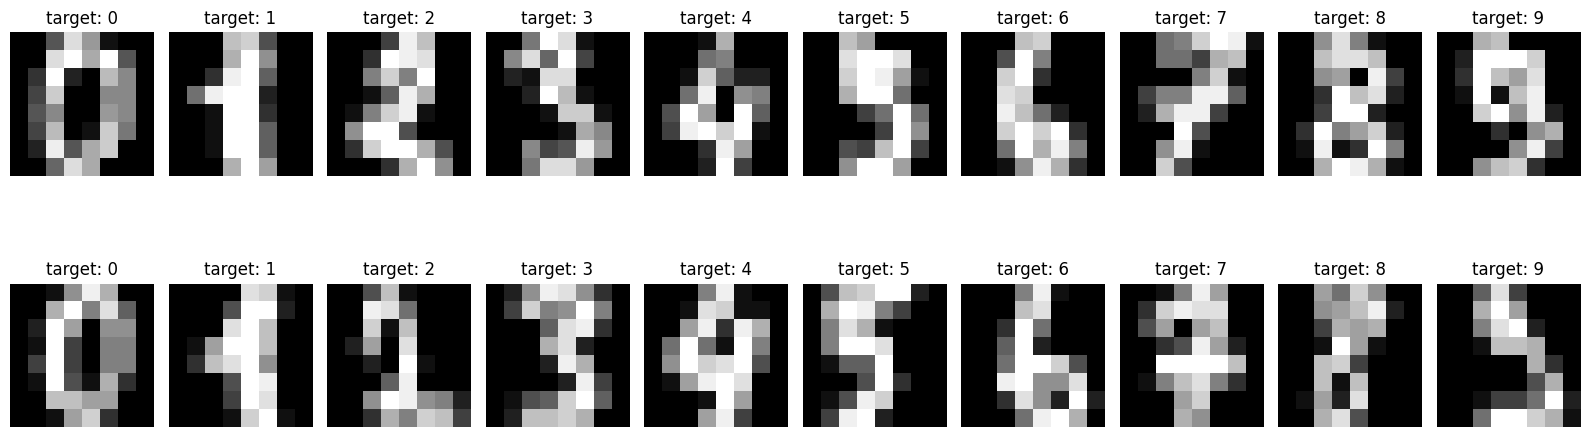

In [246]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray')
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

## Train-Test Split

Splitting the dataset into training and test sets. 
Turning labels into categorical values by utilizing kera's library


In [247]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_temp and y_temp.
x_train, x_temp, y_train, y_temp = train_test_split(data, target, test_size = 0.4, random_state = 1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=1)

In [248]:
# Delete temporary variables
del x_temp, y_temp
x_train = x_train.T
x_cv = x_cv.T
x_test = x_test.T

y_train = y_train.T
y_cv = y_cv.T
y_test = y_test.T
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (64, 1078)
the shape of the training set (target) is: (1, 1078)

the shape of the cross validation set (input) is: (64, 359)
the shape of the cross validation set (target) is: (1, 359)

the shape of the test set (input) is: (64, 360)
the shape of the test set (target) is: (1, 360)


In [249]:
def one_hot(Y):
    one_hot_Y = to_categorical(Y[0]) #The target data set is 2D array, therefore needs Y[0]
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

## Model Definition

Defining the architecture of the neural network model. This includes initializing model parameters, setting up the layer functions, forward prop, backward prop and gradient descent.


In [250]:
def init_param():
    W1 = np.random.randn(10, 64) / np.sqrt(74)
    b1 = np.random.randn(10, 1) / np.sqrt(11)
    W2 = np.random.randn(10, 10) / np.sqrt(20)
    b2 = np.random.randn(10, 1) / np.sqrt(11)
    return W1, b1, W2, b2

In [251]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [252]:
def Softmax(Z):
    a = np.exp(Z) / sum(np.exp(Z))
    return a

In [253]:
# First layer of ReLU, Second layer of Softmax
def forward_prop(W1, B1, W2, B2, X):
    Z1 = np.dot(W1, X) + B1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + B2
    A2 = Softmax(Z2)
    return Z1, A1, Z2, A2

In [254]:
def deriv_ReLU(Z):
    return Z > 0

## Backward Propagation Calculation

$$
\text{Back Propagation Calculation}
$$

$$
\text{The loss function L is defined below}
$$

$$
L = - \sum_{i}{y_i * ln(a_i)}
$$

$$
y_i \text{ is the true label 0/1 for the corresponding softmax activation output } a_i
$$

$$
\frac{\partial L}{\partial Z_i} = -(\frac{y_i}{a_i} * \frac{\partial a_i}{\partial Z_i} + \sum_{k \neq i}{\frac{y_k}{a_k} * \frac{\partial a_k}{\partial Z_i}})
$$

$$
\text{The derivative is seperated to two parts because there's two circumstance}
$$

$$
\text{which the input Z's index is equal to y's index and the input Z's index is different to y's index}
$$

$$
\frac{\partial L}{\partial Z_i} = a_i - y_i
$$

$$
Z_2 = W_2 * A_1 + B_2
$$

$$
\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial Z_2} * \frac{\partial Z_2}{\partial W_2}
=(a_2 - y_i) * a_1
$$

$$
\frac{\partial L}{\partial B_2} = \frac{\partial L}{\partial Z_2} * \frac{\partial Z_2}{\partial B_2} = (a_2 - y_i) * 1
$$

$$
\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial Z_2} * \frac{\partial Z_2}{\partial a_2} * \frac{\partial a_2}{\partial Z_1} = (a_2 - y_i) * W_2 * ReLU'(Z1)
$$

$$
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial Z_2} * \frac{\partial Z_2}{\partial a_2} * \frac{\partial a_2}{\partial Z_1} * \frac{\partial Z_1}{\partial W_1} = \frac{\partial L}{\partial Z_1} * X
$$

$$
\frac{\partial L}{\partial B_1} = \frac{\partial L}{\partial Z_2} * \frac{\partial Z_2}{\partial a_2} * \frac{\partial a_2}{\partial Z_1} * \frac{\partial Z_1}{\partial W_1} = \frac{\partial L}{\partial Z_1} * 1
$$

$$
\text{The Cost function will be the average of the sum of the loss function}
$$

In [255]:
def back_prop(Z1, A1, W2, A2, X, Y):
    one_hot_Y = one_hot(Y)
    dCost_dZ2 = A2 - one_hot_Y
    dCost_dW2 = 1 / m * np.dot(dCost_dZ2, A1.T)
    dCost_dB2 = 1 / m * np.sum(dCost_dZ2)
    
    dCost_dZ1 = np.dot(W2.T, dCost_dZ2) * deriv_ReLU(Z1)
    dCost_dW1 = 1 / m * np.dot(dCost_dZ1, X.T)
    dCost_dB1 = 1 / m * np.sum(dCost_dZ1)
    
    return dCost_dW2, dCost_dB2, dCost_dW1, dCost_dB1  

In [256]:
def gradient_descent(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    W1 = W1 - alpha * dW1 
    B1 = B1 - alpha * dB1 
    W2 = W2 - alpha * dW2
    B2 = B2 - alpha * dB2
    return W1, B1, W2, B2

In [257]:
def prediction(A2):
    predict = np.argmax(A2, 0)
    return predict

In [258]:
def accuracy(predict, Y):
    print(f"Predict : {predict}")
    print(f"True Label : {Y[0]}")
    return np.sum(predict == Y[0]) / Y[0].size

## Model Training

Training the model on the training data. Feeding the training data through the model and adjusting the model weights based on the loss.


In [259]:
def train(X, Y, iterations, alpha):
    W1, B1, W2, B2 = init_param()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW2, dB2, dW1, dB1 = back_prop(Z1, A1, W2, A2, X, Y)
        W1, B1, W2, B2 = gradient_descent(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 100 == 0:
            print("Epoch", i)
            print("Accuracy: ", accuracy(prediction(A2), Y))
    
    return W1, B1, W2, B2

#### Starting to train the model with 5000 iterations and learning rate of 0.01

In [260]:
W1, B1, W2, B2 = train(x_train, y_train, 5000, 0.01)

Epoch 0
Predict : [1 0 7 ... 3 9 7]
True Label : [3 5 4 ... 9 1 5]
Accuracy:  0.10204081632653061
Epoch 100
Predict : [7 4 7 ... 9 1 9]
True Label : [3 5 4 ... 9 1 5]
Accuracy:  0.4962894248608534
Epoch 200
Predict : [2 4 4 ... 9 1 9]
True Label : [3 5 4 ... 9 1 5]
Accuracy:  0.6660482374768089
Epoch 300
Predict : [9 0 4 ... 9 1 9]
True Label : [3 5 4 ... 9 1 5]
Accuracy:  0.7551020408163265
Epoch 400
Predict : [3 0 4 ... 9 1 5]
True Label : [3 5 4 ... 9 1 5]
Accuracy:  0.852504638218924
Epoch 500
Predict : [3 0 4 ... 9 1 5]
True Label : [3 5 4 ... 9 1 5]
Accuracy:  0.8933209647495362
Epoch 600
Predict : [3 0 4 ... 9 1 5]
True Label : [3 5 4 ... 9 1 5]
Accuracy:  0.9146567717996289
Epoch 700
Predict : [3 0 4 ... 9 1 5]
True Label : [3 5 4 ... 9 1 5]
Accuracy:  0.9239332096474954
Epoch 800
Predict : [3 5 4 ... 9 1 5]
True Label : [3 5 4 ... 9 1 5]
Accuracy:  0.9341372912801484
Epoch 900
Predict : [3 5 4 ... 9 1 5]
True Label : [3 5 4 ... 9 1 5]
Accuracy:  0.9387755102040817
Epoch 1000
P

## Model Evaluation
Results are shown by precision, recall and F1-score.

In [261]:
def make_predictions(W1, B1, W2, B2, X):
    _, _, _, A2 = forward_prop(W1, B1, W2, B2, X)
    predictions = prediction(A2)
    return predictions

In [262]:
cv_predictions = make_predictions(W1, B1, W2, B2, x_cv)
print(accuracy(cv_predictions, y_cv))

Predict : [4 7 1 5 2 7 0 3 3 1 8 2 9 8 4 4 8 4 6 1 0 1 3 7 6 9 9 4 4 9 4 9 1 7 1 1 4
 4 9 9 3 0 5 2 4 9 4 5 5 8 4 0 6 5 5 8 1 2 0 4 3 9 9 7 7 0 8 2 2 9 7 1 6 0
 4 7 6 5 7 5 7 6 1 4 9 0 1 4 1 6 9 8 3 4 0 4 4 0 6 6 5 7 1 1 7 1 7 6 4 8 6
 3 5 8 4 9 2 5 4 2 0 5 3 6 3 2 6 6 9 9 2 6 0 7 2 3 4 0 1 9 4 6 1 6 0 0 0 9
 2 3 2 8 6 3 1 3 2 2 3 0 7 4 0 0 2 6 0 8 6 5 8 1 0 6 4 3 8 2 7 3 0 3 0 7 2
 3 4 2 1 5 1 0 4 3 7 6 6 9 5 5 5 4 1 2 3 7 5 1 5 1 8 2 1 7 8 3 5 1 0 1 3 3
 8 9 9 5 4 7 4 7 0 3 0 2 3 4 6 8 0 4 3 7 2 7 2 3 9 3 1 2 5 7 9 9 1 8 3 4 4
 6 7 4 8 0 9 4 3 6 9 8 1 2 4 4 6 7 6 9 3 2 3 9 2 4 3 3 6 9 2 2 9 0 0 8 8 1
 6 7 0 9 6 5 6 3 6 2 8 6 9 0 4 5 4 4 1 3 3 0 8 3 3 9 5 0 1 9 5 2 0 5 1 3 4
 5 2 1 5 8 7 1 9 6 3 2 4 0 0 9 4 7 0 1 1 5 8 1 7 1 1]
True Label : [4 7 1 9 2 7 0 5 3 1 8 2 9 8 4 4 8 4 6 1 0 1 3 7 6 9 9 4 4 7 4 9 1 7 1 1 4
 4 9 9 3 0 5 2 4 9 4 5 5 8 4 0 6 5 5 8 1 2 0 4 3 9 9 7 7 0 8 2 2 9 7 6 6 0
 4 7 6 5 7 5 7 6 1 4 9 0 1 4 1 6 9 8 3 4 0 4 4 0 6 6 5 7 1 1 7 1 7 6 4 8 6
 3 5 8 4 9 2 5 4 2 0 5 

##### Using sklearn's precision, recall and F1score to evaluate the results on the cv and test set.

In [263]:
precision_recall_fscore_support(y_cv[0], cv_predictions, average='macro')

(0.953146497144688, 0.9499238129312098, 0.9510851779044149, None)

In [264]:
test_predictions = make_predictions(W1, B1, W2, B2, x_test)
print(accuracy(test_predictions, y_test))

Predict : [5 2 9 5 5 8 3 5 8 3 4 6 8 5 8 2 7 3 6 9 1 6 2 5 3 6 0 4 0 6 6 4 6 4 7 8 0
 3 2 8 6 1 5 2 4 7 0 0 5 4 9 4 1 8 6 9 4 7 9 8 2 6 7 2 1 7 0 9 1 1 9 4 4 5
 4 0 4 3 7 7 8 0 7 7 4 9 9 9 9 9 3 1 8 9 3 4 2 8 9 3 3 8 7 5 2 7 8 1 2 3 5
 6 8 5 6 3 8 2 8 5 2 4 7 5 6 3 4 8 1 6 7 8 1 6 7 2 3 2 9 5 4 0 0 1 2 5 2 9
 3 7 4 3 2 3 9 9 3 1 4 1 4 9 7 2 6 0 2 1 3 7 0 4 0 0 4 0 8 5 3 9 1 9 9 0 3
 3 4 1 2 1 8 8 4 6 3 8 9 7 8 5 9 3 3 5 2 5 0 1 1 5 2 0 7 7 7 2 5 6 9 2 5 1
 0 6 7 7 4 0 3 0 6 6 9 5 0 8 2 6 6 5 0 7 7 2 4 2 9 0 2 0 9 7 2 9 5 5 3 0 1
 0 0 4 4 9 1 9 9 7 6 3 7 0 1 3 2 2 5 6 8 5 0 7 6 9 3 0 0 6 0 1 9 4 3 7 4 0
 3 2 6 1 7 2 8 4 6 2 3 8 9 3 3 8 9 2 8 1 8 2 4 7 4 2 7 5 6 1 3 7 5 6 3 7 1
 6 8 0 9 7 5 3 3 4 1 3 2 7 0 1 8 2 6 4 7 6 3 8 3 1 6 7]
True Label : [5 2 9 5 5 8 3 5 8 3 4 6 8 5 8 2 7 3 6 9 1 6 2 5 3 6 0 4 0 6 6 4 6 4 7 8 0
 3 2 8 6 1 5 2 4 7 0 0 5 4 9 4 1 8 6 9 4 7 9 8 2 6 7 2 8 7 0 9 1 1 9 4 4 5
 4 0 4 9 7 7 8 0 7 7 4 9 9 9 9 9 3 1 8 9 3 4 8 8 9 3 3 8 3 9 2 7 8 1 2 3 5
 5 8 5 6 3 8 2 8 5 2 

In [265]:
precision_recall_fscore_support(y_test[0], test_predictions, average='macro')

(0.9521648648866392, 0.9552526254987933, 0.9528402898315342, None)

##### Both F1score reached around 0.95.